![Pokémon!](https://31.media.tumblr.com/5830f6d55c1ff0794814cb333ea5e815/tumblr_inline_n1onkgrQq71s90mb3.png)

---

In [1]:
from collections import ChainMap, Counter, Iterable, defaultdict
from itertools import chain, combinations
from math import isnan
from random import sample, seed
import numpy as np
import pandas as pd
import seaborn as sns

from pokemon_types import gen6

%matplotlib inline
sns.set(style='ticks')

---

How many types are there, and what are they?

In [2]:
print(sorted(gen6))
len(gen6)

['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']


18

In [100]:
for t1 in gen6:
    for t2 in gen6:
        if t2 not in gen6[t1]:
            gen6[t1][t2] = 1.0

In [103]:
[len(v) for v in gen6.values()]

[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]

In [104]:
from functools import lru_cache

@lru_cache(maxsize=None)
def effectiveness(type_, eff):
    return {k for k, v in gen6[type_].items() if v == eff}

In [105]:
print(effectiveness('bug', 2.0))
print(effectiveness('bug', 0.5))

{'dark', 'grass', 'psychic'}
{'steel', 'ghost', 'flying', 'poison', 'fairy', 'fighting', 'fire'}


What's the minimum sized subset of types that will be super effective to all other types?

In [106]:
from itertools import chain, combinations

def touches(types, eff):
    return set.union(*(effectiveness(t, eff) for t in types))

def cover(k):
    all_types = set(gen6)
    sols = []
    for combo in combinations(all_types, k):
        if touches(combo, 2.0) == all_types:
            sols.append(combo)
    return sols

In [107]:
print(cover(6))
sorted(sorted(types) for types in cover(7))

[]


[['dark', 'electric', 'fighting', 'flying', 'ground', 'ice', 'poison'],
 ['dark', 'electric', 'fighting', 'flying', 'ground', 'ice', 'steel'],
 ['dark', 'fairy', 'fighting', 'grass', 'ground', 'poison', 'rock'],
 ['dark', 'fighting', 'flying', 'grass', 'ground', 'ice', 'poison'],
 ['dark', 'fighting', 'flying', 'grass', 'ground', 'ice', 'steel'],
 ['electric', 'fighting', 'flying', 'ghost', 'ground', 'ice', 'poison'],
 ['electric', 'fighting', 'flying', 'ghost', 'ground', 'ice', 'steel'],
 ['fairy', 'fighting', 'ghost', 'grass', 'ground', 'poison', 'rock'],
 ['fighting', 'flying', 'ghost', 'grass', 'ground', 'ice', 'poison'],
 ['fighting', 'flying', 'ghost', 'grass', 'ground', 'ice', 'steel']]

In [108]:
from itertools import chain
from collections import Counter

Counter(chain.from_iterable(cover(7))).most_common()

[('ground', 10),
 ('fighting', 10),
 ('ice', 8),
 ('flying', 8),
 ('poison', 6),
 ('grass', 6),
 ('ghost', 5),
 ('dark', 5),
 ('electric', 4),
 ('steel', 4),
 ('fairy', 2),
 ('rock', 2)]

That's cool, because in standard Pokémon games, a team can consist of up to 6 members.

We can go further by asking for a team that also has minimum not very effective at attacking. Let's arbitrarily define a score.

In [109]:
def score(types):
    a = touches(types, 2.0)
    b = touches(types, 0.5)
    c = touches(types, 0.0)
    return 2*len(a) - len(b) - 2*len(c)

In [110]:
combos = ((score(combo), combo, len(combo)) for combo
           in chain.from_iterable(combinations(gen6, k) for k in range(1, 8)))
sorted(combos, reverse=True)[:10]

[(18, ('water', 'electric', 'ground', 'flying', 'ghost', 'steel', 'fairy'), 7),
 (18, ('water', 'electric', 'ground', 'flying', 'dark', 'steel', 'fairy'), 7),
 (18, ('ice', 'ground', 'rock', 'dark', 'steel', 'fairy'), 6),
 (18, ('ice', 'ground', 'flying', 'ghost', 'steel', 'fairy'), 6),
 (18, ('ice', 'ground', 'flying', 'dark', 'steel', 'fairy'), 6),
 (18, ('grass', 'ice', 'ground', 'rock', 'dark', 'steel', 'fairy'), 7),
 (18, ('grass', 'ice', 'ground', 'flying', 'ghost', 'steel', 'fairy'), 7),
 (18, ('grass', 'ice', 'ground', 'flying', 'dark', 'steel', 'fairy'), 7),
 (18, ('grass', 'ground', 'flying', 'rock', 'dark', 'steel', 'fairy'), 7),
 (18, ('grass', 'ground', 'bug', 'rock', 'dark', 'steel', 'fairy'), 7)]

In [111]:
pokemon_df = pd.read_csv('Pokemon.csv')
pokemon_df.sample(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
129,120,Staryu,Water,NaN,340,30,45,55,70,55,85,1,False
220,205,Forretress,Bug,Steel,465,75,90,140,60,60,40,2,False
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
739,671,Florges,Fairy,NaN,552,78,65,68,112,154,75,6,False
294,271,Lombre,Water,Grass,340,60,50,50,60,70,50,3,False
202,187,Hoppip,Grass,Flying,250,35,35,40,35,55,50,2,False


In [112]:
pokemon_df7 = pd.read_csv('pokemon_gen7.csv')
'Decidueye' in pokemon_df7['species'].values.flatten()

True

In [113]:
pokemon_df7.columns

Index(['id', 'ndex', 'species', 'forme', 'type1', 'type2', 'ability1',
       'ability2', 'abilityH', 'hp', 'attack', 'defense', 'spattack',
       'spdefense', 'speed', 'total', 'weight', 'height', 'dex1', 'dex2',
       'class', 'percent-male', 'percent-female', 'pre-evolution',
       'egg-group1', 'egg-group2'],
      dtype='object')

Let's modifiy gen6 to have keys with type combinations, where the effectiveness is the multiplication.

In [171]:
gen6_pair = defaultdict(lambda: {})
for attack_type in gen6:
    for type_defend in gen6:
        eff = gen6[attack_type][type_defend]
        gen6_pair[attack_type][frozenset({type_defend})] = eff
    for type_defend1, type_defend2 in combinations(gen6, 2):
        eff1 = gen6[attack_type].get(type_defend1, 1.0)
        eff2 = gen6[attack_type].get(type_defend2, 1.0)
        eff_combine = eff1 * eff2
        gen6_pair[attack_type][frozenset({type_defend1, type_defend2})] = eff_combine
                
#         eff1 = gen6[type1].get(type_other, 1.0)
#         try:
#             eff2 = gen6[type2].get(type_other, 1.0)
#         except:
#             print(type2, gen6[type2])
#         eff = eff1 * eff2
#         if eff != 1.0:
#             key = frozenset({type1, type2})
#             gen6_pair[key][type_other] = eff

In [174]:
pokemon_types = defaultdict(set)
for _, row in pokemon_df7.iterrows():
    type_ = {row['type1'].lower()}
    if isinstance(row['type2'], str):
        type_.add(row['type2'].lower())
    pokemon_types[frozenset(type_)].add(row['species'])

In [175]:
pokemon_types[frozenset({'grass', 'ghost'})]

{'Decidueye', 'Dhelmise', 'Gourgeist', 'Phantump', 'Pumpkaboo', 'Trevenant'}

In [176]:
'Litten' in list(pokemon_df7[['species']].values.flatten())

True

In [177]:
seed(42)

sample(pokemon_types.keys(), 4)

[frozenset({'fairy', 'psychic'}),
 frozenset({'bug', 'poison'}),
 frozenset({'fighting', 'psychic'}),
 frozenset({'dark', 'grass'})]

[1] Is there an attack move of same type bonus? Yes, 1.5x damage (STAB). http://bulbapedia.bulbagarden.net/wiki/Same-type_attack_bonus

[2] Are there Pokémon moves of multiple types? No, doing so would incentivize using just those Pokémon which learn moves that give double STAB. http://www.serebiiforums.com/showthread.php?322627-Multi-type-moves&s=d6e2e60733d82b53245a846d1195f511

[3] Is "Anti-STAB" a thing? No. If it was, then Pokémon whose types have more numerous < 1.0 multipliers (weaknesses) would have have a paucity of moves that did at least normal damage. https://www.reddit.com/r/pokemon/comments/40l0ab/antistab/, http://www.gamefaqs.com/boards/661226-pokemon-black-version-2/62143899

It doesn't make sense to have outgoing edges from a set of types of size greater than 1. Since damage taken is calculated from the damage of the move (not the Pokémon's type), and [2], there cannot be outgoing edges from a multiple typed vertex.

We still want to look at weights both incoming and outgoing for an arbitrary set of types as vertices. We had viewed vertices as types for moves, before, but now we're adding a Pokémon perspective on vertices. This causes problems, as just forshadowed by [1] and [2].

It still makes sense to look outgoing edges for just one type [2], and it's relatively safe to assume that a Pokémon can learn a moves typed like any of its types. In addition, STAB  gives incentive to use those moves [1].

[4] We can then define: _the outgoing for a set of types is the union of the outgoing for each individual type._ But then, what about overlapping scores? How about this: we take the max of the effectivenesses. (We assume that higher damage increases our scoring function.) Assume that the Pokémon will make the move that maximizes damage. Now [4] is valid.

In [204]:
def outgoing(types: Iterable):
    df = pd.DataFrame(gen6[t] for t in types)
    return pd.Series({t: df[t].max() for t in df})

In [205]:
outgoing(['ghost', 'ice'])

bug         1.0
dark        1.0
dragon      2.0
electric    1.0
fairy       1.0
fighting    1.0
fire        1.0
flying      2.0
ghost       2.0
grass       2.0
ground      2.0
ice         1.0
normal      1.0
poison      1.0
psychic     2.0
rock        1.0
steel       1.0
water       1.0
dtype: float64

To see this working, let's see the most conflicting Pokémon type pairs, of those who have more than one type.

In [206]:
conflicting = []

for types in list(pokemon_types)[:]:
    df = pd.DataFrame(gen6[t] for t in types)
    score = pd.Series(df[t].max() - df[t].min() for t in df).sum()
    conflicting.append((score, types))

sorted(conflicting, reverse=True)[:10]

[(14.5, frozenset({'fighting', 'ice'})),
 (13.0, frozenset({'ground', 'ice'})),
 (13.0, frozenset({'fighting', 'flying'})),
 (12.5, frozenset({'bug', 'ground'})),
 (12.0, frozenset({'ground', 'poison'})),
 (12.0, frozenset({'fighting', 'rock'})),
 (12.0, frozenset({'fighting', 'ghost'})),
 (11.5, frozenset({'flying', 'ground'})),
 (11.5, frozenset({'fighting', 'psychic'})),
 (11.5, frozenset({'fighting', 'poison'}))]

In [207]:
outgoing({'ground', 'ice'})

bug         1.0
dark        1.0
dragon      2.0
electric    2.0
fairy       1.0
fighting    1.0
fire        2.0
flying      2.0
ghost       1.0
grass       2.0
ground      2.0
ice         1.0
normal      1.0
poison      2.0
psychic     1.0
rock        2.0
steel       2.0
water       1.0
dtype: float64

How shall we do this (incoming)? The multiplier on move against a Pokémon is defined as the product of multipliers for each of its types. So what? We still have the case for moves overlap on their multipliers... We could just take the max? "The most vulnerable"... no way, because I it's an easy brute forced lemma that there _does exist_ some super weakness per type. Instead lets go with mean on the multipliers.

In the future it may be worth doing a weighted mean on the distribution of types that are output from the previous assumptions about the move choice in `outgoing`.

In [208]:
def incoming(types: Iterable):
    df = pd.DataFrame(gen6_pair).transpose()
    return df[frozenset(types)]

In [209]:
incoming(['fairy', 'ice'])

bug         0.5
dark        0.5
dragon      0.0
electric    1.0
fairy       1.0
fighting    1.0
fire        2.0
flying      1.0
ghost       1.0
grass       1.0
ground      1.0
ice         0.5
normal      1.0
poison      2.0
psychic     1.0
rock        2.0
steel       4.0
water       1.0
Name: (ice, fairy), dtype: float64

In [210]:
sorted((incoming(types).sum(), types) for types in pokemon_types)[:10]

[(13.25, frozenset({'fairy', 'steel'})),
 (13.5, frozenset({'flying', 'steel'})),
 (14.25, frozenset({'dragon', 'steel'})),
 (14.25, frozenset({'ghost', 'steel'})),
 (14.5, frozenset({'steel', 'water'})),
 (15.0, frozenset({'steel'})),
 (15.5, frozenset({'dark', 'ghost'})),
 (15.5, frozenset({'fighting', 'steel'})),
 (15.75, frozenset({'bug', 'steel'})),
 (15.75, frozenset({'ground', 'steel'}))]

So how will score the values of `incoming` and `outgoing`? For `outgoing` the number of records is also important. But we could start with naïve sum.

In [211]:
@lru_cache(maxsize=None)
def types_score(types):
    attack = outgoing(types).sum()
    defense = -incoming(types).sum()
    return attack, defense

In [212]:
from sklearn import pipeline, preprocessing
import logging

logging.getLogger('sklearn').setLevel(logging.CRITICAL)

type_scores = []
for types in pokemon_types:
    attack, defense = types_score(types)
    type_scores.append({
        'attack': attack,
        'defense': defense,
        'types': types
    })
type_scores = pd.DataFrame(type_scores)
    
pipe = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    preprocessing.MinMaxScaler(),
)    
type_scores[['attack', 'defense']] = type_scores[['attack', 'defense']].apply(
    lambda df: pipe.fit_transform(df))

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

In [213]:
type_scores.sort_values('attack', ascending=False)[:6]

,attack,defense,types
55,1.000000,0.352941,"(ice, ground)"
127,1.000000,0.274510,"(fighting, ice)"
21,0.909091,0.137255,"(rock, ground)"
108,0.909091,0.313725,"(rock, fighting)"
49,0.909091,0.588235,"(flying, ground)"
72,0.909091,0.588235,"(fire, ground)"


In [21]:
type_scores.sort_values('defense', ascending=False)[:6]

,attack,defense,types
50,0.189189,1.000000,(ghost)
37,0.081081,0.965174,(dragon)
9,0.000000,0.930348,(normal)
48,0.243243,0.890547,(dark)
72,0.243243,0.870647,"(dark, ghost)"
20,0.216216,0.820896,(psychic)


In [215]:
type_scores.sort_values('defense', ascending=True)[:6]

,attack,defense,types
120,0.772727,0.000000,"(rock, ice)"
16,0.545455,0.078431,"(grass, bug)"
88,0.636364,0.078431,"(ice, grass)"
21,0.909091,0.137255,"(rock, ground)"
26,0.590909,0.156863,"(grass, psychic)"
53,0.727273,0.196078,"(dark, ice)"


In [23]:
from numpy.linalg import norm
from scipy.stats import percentileofscore

best = sorted((sum(vec), i) for i, vec in enumerate(type_scores[['attack', 'defense']].values))
scores, indices = zip(*best)
print(type_scores.take(list(reversed(indices)))[:10])

types = frozenset({'normal'})
row = type_scores[type_scores['types'] == types]
percentileofscore(scores, sum(row[['attack', 'defense']].values.flatten()))

       attack   defense             types
53   0.810811  0.447761  (flying, ground)
59   1.000000  0.228856     (ice, ground)
129  0.783784  0.417910     (rock, fairy)
50   0.189189  1.000000           (ghost)
22   0.891892  0.293532    (rock, ground)
131  0.432432  0.751244  (ghost, psychic)
105  0.837838  0.343284  (dark, fighting)
122  0.459459  0.716418   (dark, psychic)
76   0.864865  0.298507    (fire, ground)
132  0.756757  0.402985     (fire, water)


21.052631578947366

In [216]:
pokemon_types[frozenset({'ground', 'ice'})]

{'Mamoswine', 'Piloswine', 'Swinub'}

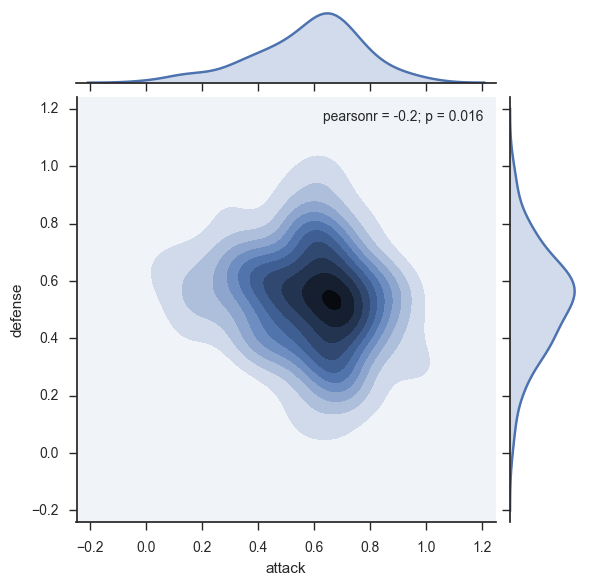

In [219]:
sns.jointplot('attack', 'defense', data=type_scores, kind='kde')

In [222]:
pokemon_df7.columns

Index(['id', 'ndex', 'species', 'forme', 'type1', 'type2', 'ability1',
       'ability2', 'abilityH', 'hp', 'attack', 'defense', 'spattack',
       'spdefense', 'speed', 'total', 'weight', 'height', 'dex1', 'dex2',
       'class', 'percent-male', 'percent-female', 'pre-evolution',
       'egg-group1', 'egg-group2'],
      dtype='object')

In [223]:
name = 'Blissey'
score = pokemon_df7[pokemon_df7['species'] == name]['total'].values[0]
percentileofscore(pokemon_df7['total'].values, score)

81.432610744580586

In [236]:
def poke_score(name):
    score = pokemon_df7[pokemon_df7['species'] == name]['total'].values[0]
    stat_percentile = percentileofscore(pokemon_df7['total'].values, score)
    
    for types, pokemon in pokemon_types.items():
        if name.capitalize() in pokemon:
            break
      
    norms = np.sum(type_scores[['attack', 'defense']].values, axis=1)
    row = type_scores[type_scores['types'] == types]
    cover_percentile = percentileofscore(norms, row[['attack', 'defense']].values.sum())
    
    return stat_percentile, cover_percentile
    
poke_score('Toxapex')

(66.446748350612623, 81.164383561643831)

In [238]:
all_names = pokemon_df7['species'].values
norms = []
for name in all_names:
    norms.append(sum(poke_score(name)))

In [239]:
def poke_score_meta(name):
    return percentileofscore(norms, sum(poke_score(name)))

In [240]:
best = sorted((poke_score_meta(name), name) for name in all_names)[::-1]

In [243]:
poke_score_meta('Toxapex')

92.554194156456177

What's really the best starter?

What are the best pokemon in the newest generation?

What if we exclude legendaries from the list?

let's exclude legendaries, and megas

In [248]:
pokemon_df7.columns

Index(['id', 'ndex', 'species', 'forme', 'type1', 'type2', 'ability1',
       'ability2', 'abilityH', 'hp', 'attack', 'defense', 'spattack',
       'spdefense', 'speed', 'total', 'weight', 'height', 'dex1', 'dex2',
       'class', 'percent-male', 'percent-female', 'pre-evolution',
       'egg-group1', 'egg-group2'],
      dtype='object')

In [253]:
# def legendary(name):
#     return pokemon_df[pokemon_df['Name'] == name]['Legendary'].values[0]

def mega(name):
    return 'Mega ' in name

In [264]:
sorted(((poke_score(name), name) for name in set(pokemon_df7['species'].values.flatten())
        if not mega(name)),
       reverse=True, key=lambda x: 1*x[0][0] + 0.4*x[0][1])

[((96.182846371347779, 91.095890410958901), 'Dialga'),
 ((91.093308199811503, 100.0), 'Magearna'),
 ((96.182846371347779, 83.561643835616437), 'Solgaleo'),
 ((91.093308199811503, 96.232876712328761), 'Landorus'),
 ((91.093308199811503, 94.520547945205479), 'Genesect'),
 ((91.093308199811503, 92.465753424657535), 'Marshadow'),
 ((91.093308199811503, 89.38356164383562), 'Heatran'),
 ((87.276154571159282, 97.260273972602747), 'Cobalion'),
 ((96.182846371347779, 72.260273972602747), 'Reshiram'),
 ((91.093308199811503, 84.93150684931507), 'Volcanion'),
 ((91.093308199811503, 83.561643835616437), 'Jirachi'),
 ((91.093308199811503, 83.561643835616437), 'Metagross'),
 ((84.637134778510841, 98.630136986301366), 'Celesteela'),
 ((96.182846371347779, 67.123287671232873), 'Yveltal'),
 ((87.276154571159282, 80.136986301369859), 'Thundurus'),
 ((87.276154571159282, 80.136986301369859), 'Zapdos'),
 ((96.182846371347779, 57.534246575342465), 'Palkia'),
 ((87.276154571159282, 78.767123287671239), 'Keld

In [259]:
df = pd.DataFrame([{'stat': poke_score(name)[0], 'cover': poke_score(name)[1], 'name': name}
                   for name in set(pokemon_df7['species'].values.flatten())])

All kinds of pokemon

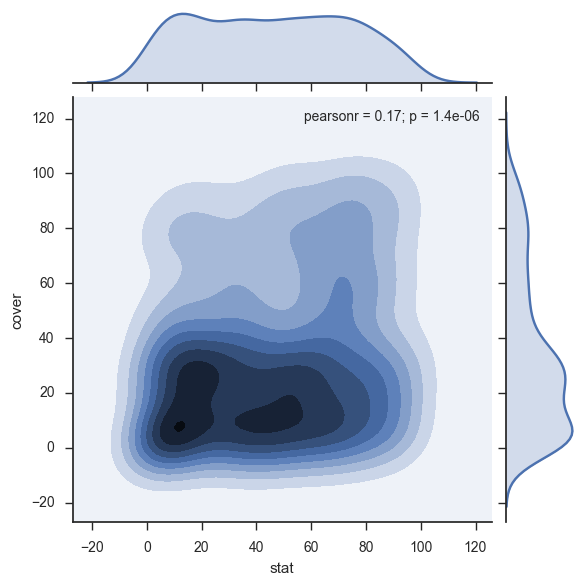

In [261]:
sns.jointplot('stat', 'cover', data=df, kind='kde')

Only the legendaries

In [37]:
jdf_plot = df[list(legendary(name) for name in df['name'])]
sns.jointplot('stat', 'cover', data=df_plot, xlim=[0, 100])
#.plot_joint(sns.kdeplot, zorder=0, n_levels=20, shade=True, alpha=0.4, kernel='epa')

NameError: name 'df_plot' is not defined

not the legendaries or the megas

In [ ]:
df_plot = df[list((not legendary(name) and not mega(name)) for name in df['name'])]
sns.jointplot('stat', 'cover', data=df_plot)

In [ ]:
NTRIALS = 1000

rows = []
for _ in range(int(1e4)):
    team = sample(list(pokemon_types), 6)
    attack, defense = map(np.mean, zip(*map(types_score, team)))
    rows.append({
        'attack': attack,
        'defense': defense
    })

team_scores = pd.DataFrame(rows)

pipe = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    preprocessing.MinMaxScaler(),
)

def f(x):
    print(x, type(x))
    
print(team_scores.isnull().values.any())
    
team_scores = pd.DataFrame(rows)
team_scores[['attack', 'defense']] = team_scores[['attack', 'defense']].apply(
    lambda df: pipe.fit_transform(f(df.values)))

# sns.jointplot('attack', 'defense', data=team_scores, kind='kde')

In [ ]:
gen6